# Time series values for Vatnsendi pumpstation

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
df_pressure_1 = pd.read_excel("data/H-KOP-VE-ÞS212.xlsx")
df_pressure_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure_2 = pd.read_excel("data/H-KOP-VE-ÞS213.xlsx")
df_pressure_2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

In [102]:
df_pressure_1.head()

,start_time,value
0,2022-03-14 23:00:00,9.0
1,2022-03-13 16:00:00,9.0
2,2022-03-08 02:00:00,9.0
3,2022-03-08 03:00:00,9.0
4,2022-03-13 18:00:00,9.0


In [103]:
df_pressure_2.head()

,start_time,value
0,2022-03-14 23:00:00,5.60
1,2022-03-13 16:00:00,5.55
2,2022-03-08 02:00:00,5.56
3,2022-03-08 03:00:00,5.56
4,2022-03-13 18:00:00,5.63


In [104]:
# Convert 'start_time' to datetime format
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-10-03"
df_specific_day = df_pressure_1[df_pressure_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-10-03 01:00:00,9.01,1.000966
2024-10-03 02:00:00,9.01,1.000966
2024-10-03 03:00:00,9.00,0.999855
2024-10-03 04:00:00,9.00,0.999855
2024-10-03 05:00:00,9.00,0.999855
2024-10-03 06:00:00,9.00,0.999855
2024-10-03 07:00:00,9.00,0.999855
2024-10-03 08:00:00,9.00,0.999855
2024-10-03 09:00:00,9.00,0.999855


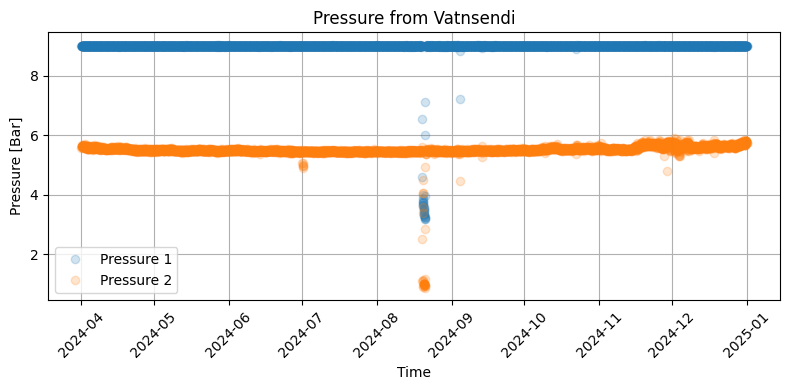

In [105]:
# Convert 'start_time' to datetime format for both DataFrames
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')
df_pressure_2['start_time'] = pd.to_datetime(df_pressure_2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_pressure_1[(df_pressure_1['start_time'].dt.year == 2024) & (df_pressure_1['start_time'].dt.month > 3)]
df_filtered_2 = df_pressure_2[(df_pressure_2['start_time'].dt.year == 2024) & (df_pressure_2['start_time'].dt.month > 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_pressure_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 1')  # Alpha controls opacity

# Plot pressure_2 from df_pressure_2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [106]:
df_flow_1 = pd.read_excel("data/H-KOP-VE-RS212.xlsx")
df_flow_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow2 = pd.read_excel("data/H-KOP-VE-RS213.xlsx")
df_flow2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

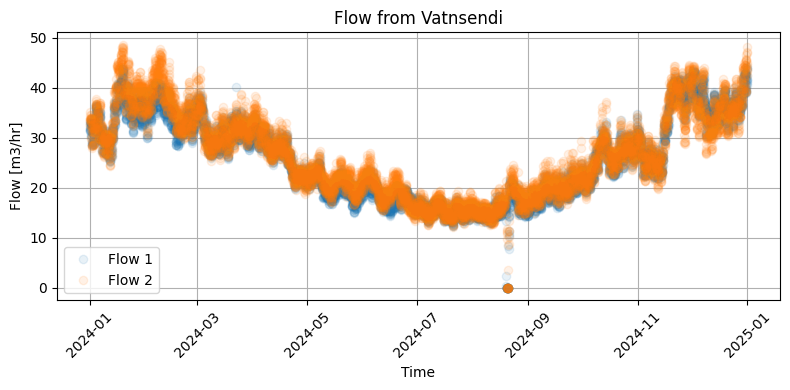

In [107]:
# Convert 'start_time' to datetime format for both DataFrames
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
# df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) & (df_flow_1['start_time'].dt.month == 3)]
# df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024) & (df_flow2['start_time'].dt.month == 3)]

df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) ]
df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_flow_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.1, label='Flow 1')  # Alpha controls opacity

# Plot pressure_2 from df_flow2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.1, label='Flow 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m3/hr]')
plt.title('Flow from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Average Flow 1 (2024): 25.74 m³/hr
Average Flow 2 (2024): 26.55 m³/hr


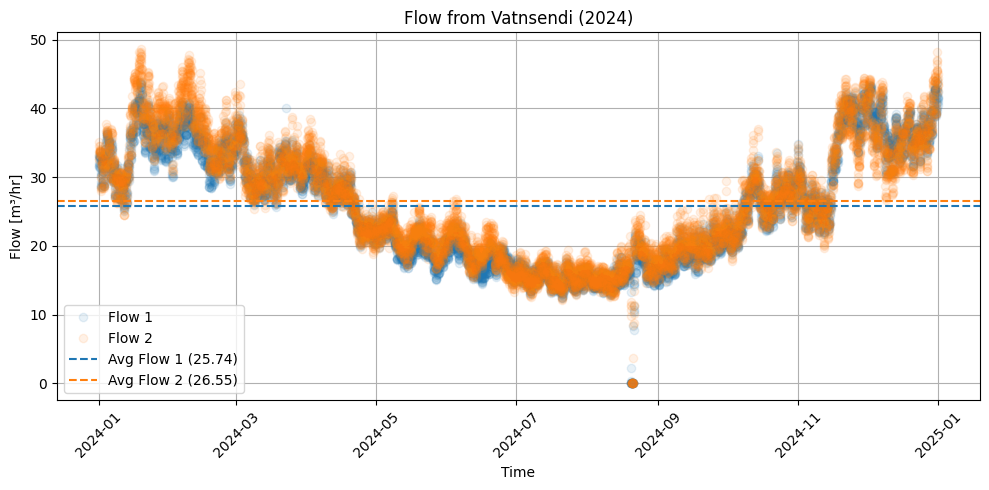

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'start_time' to datetime
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for 2024
df_filtered_1 = df_flow_1[df_flow_1['start_time'].dt.year == 2024]
df_filtered_2 = df_flow2[df_flow2['start_time'].dt.year == 2024]

# Compute yearly averages
avg_flow_1 = df_filtered_1['value'].mean()
avg_flow_2 = df_filtered_2['value'].mean()

# Print the average values
print(f"Average Flow 1 (2024): {avg_flow_1:.2f} m³/hr")
print(f"Average Flow 2 (2024): {avg_flow_2:.2f} m³/hr")

# Plot
plt.figure(figsize=(10, 5))

# Plot Flow 1
sc1, = plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], 
                marker='o', linestyle='', alpha=0.1, label='Flow 1')

# Plot Flow 2
sc2, = plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], 
                marker='o', linestyle='', alpha=0.1, label='Flow 2')

# Plot average lines using same colors
plt.axhline(avg_flow_1, color=sc1.get_color(), linestyle='--', linewidth=1.5, label=f'Avg Flow 1 ({avg_flow_1:.2f})')
plt.axhline(avg_flow_2, color=sc2.get_color(), linestyle='--', linewidth=1.5, label=f'Avg Flow 2 ({avg_flow_2:.2f})')

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m³/hr]')
plt.title('Flow from Vatnsendi (2024)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


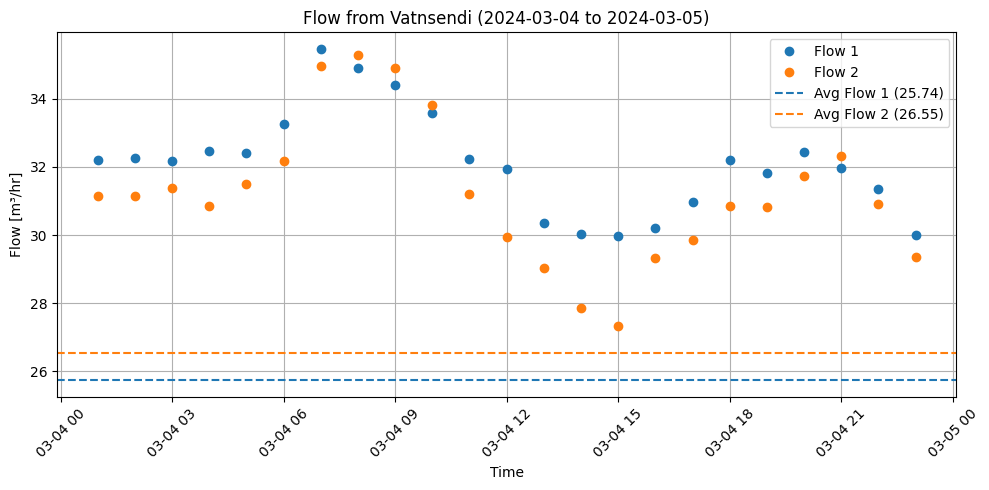

In [109]:
from datetime import datetime

# Define your subset range
start_day = datetime(2024, 3, 4)
end_day = datetime(2024, 3, 5)

# Filter the original filtered data
subset_1 = df_filtered_1[(df_filtered_1['start_time'] >= start_day) & (df_filtered_1['start_time'] <= end_day)]
subset_2 = df_filtered_2[(df_filtered_2['start_time'] >= start_day) & (df_filtered_2['start_time'] <= end_day)]

# Plot
plt.figure(figsize=(10, 5))

# Plot subset Flow 1
sc1, = plt.plot(subset_1['start_time'], subset_1['value'], 
                marker='o', linestyle='', label='Flow 1')

# Plot subset Flow 2
sc2, = plt.plot(subset_2['start_time'], subset_2['value'], 
                marker='o', linestyle='', label='Flow 2')

# Add average lines from earlier full-year values
plt.axhline(avg_flow_1, color=sc1.get_color(), linestyle='--', linewidth=1.5, label=f'Avg Flow 1 ({avg_flow_1:.2f})')
plt.axhline(avg_flow_2, color=sc2.get_color(), linestyle='--', linewidth=1.5, label=f'Avg Flow 2 ({avg_flow_2:.2f})')

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m³/hr]')
plt.title(f'Flow from Vatnsendi ({start_day.date()} to {end_day.date()})')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [110]:
from datetime import datetime
import pandas as pd

# Ensure start_time is the index
df_filtered_1 = df_filtered_1.set_index('start_time')
df_filtered_2 = df_filtered_2.set_index('start_time')

# Combine into single DataFrame
flow = pd.concat([df_filtered_1['value'], df_filtered_2['value']], axis=1)
flow.columns = ['Flow1_value', 'Flow2_value']

# Step 1: Filter by desired date range
start_date = datetime(2024, 7, 4)
end_date = datetime(2024, 7, 5)
flow_subset = flow.loc[(flow.index >= start_date) & (flow.index <= end_date)]

# Step 2: Compute average within this filtered range
avg_flow1 = flow_subset['Flow1_value'].mean()
avg_flow2 = flow_subset['Flow2_value'].mean()

# Step 3: Add relative change columns (compared to average in selected range)
flow_subset['Relative_Flow1'] = flow_subset['Flow1_value'] / avg_flow1
flow_subset['Relative_Flow2'] = flow_subset['Flow2_value'] / avg_flow2

# Step 4: Optionally round for readability
flow_subset = flow_subset.round(3)

# Final result
flow_subset.head()


/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_94812/603210279.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_subset['Relative_Flow1'] = flow_subset['Flow1_value'] / avg_flow1
/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_94812/603210279.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_subset['Relative_Flow2'] = flow_subset['Flow2_value'] / avg_flow2


,Flow1_value,Flow2_value,Relative_Flow1,Relative_Flow2
start_time,,,,
2024-07-04 01:00:00,14.28,14.01,0.898,0.873
2024-07-04 02:00:00,14.55,14.59,0.915,0.909
2024-07-04 03:00:00,14.60,13.98,0.918,0.871
2024-07-04 04:00:00,14.58,14.37,0.917,0.895
2024-07-04 05:00:00,14.70,15.04,0.924,0.937


In [111]:
flow_subset

,Flow1_value,Flow2_value,Relative_Flow1,Relative_Flow2
start_time,,,,
2024-07-04 01:00:00,14.28,14.01,0.898,0.873
2024-07-04 02:00:00,14.55,14.59,0.915,0.909
2024-07-04 03:00:00,14.60,13.98,0.918,0.871
2024-07-04 04:00:00,14.58,14.37,0.917,0.895
2024-07-04 05:00:00,14.70,15.04,0.924,0.937
2024-07-04 06:00:00,15.56,16.17,0.978,1.007
2024-07-04 07:00:00,17.22,17.24,1.083,1.074
2024-07-04 08:00:00,17.11,17.39,1.076,1.083
2024-07-04 09:00:00,16.84,16.79,1.059,1.046


In [112]:
# Ensure start_time is the index
df_filtered_1 = df_filtered_1.set_index('start_time')
df_filtered_2 = df_filtered_2.set_index('start_time')

# Compute yearly averages
avg_flow1 = df_filtered_1['value'].mean()
avg_flow2 = df_filtered_2['value'].mean()

# Concatenate value columns
flow = pd.concat([df_filtered_1['value'], df_filtered_2['value']], axis=1)
flow.columns = ['Flow1_value', 'Flow2_value']

# Add relative change columns
flow['Relative_Flow1'] = flow['Flow1_value'] / avg_flow1
flow['Relative_Flow2'] = flow['Flow2_value'] / avg_flow2

# Optionally: round for readability
flow = flow.round(3)

# Show result
flow.head()


KeyError: "None of ['start_time'] are in the columns"

In [ ]:
from datetime import datetime

# Select your desired time range
start_date = datetime(2024, 7, 4)
end_date = datetime(2024, 7, 5)

# Filter the flow DataFrame based on the selected dates
flow_subset = flow.loc[(flow.index >= start_date) & (flow.index <= end_date)]

# Display the result
flow_subset


In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for Flow 2 values
plt.figure(figsize=(8, 4))
plt.hist(df_filtered_2['value'], bins=20, edgecolor='black', alpha=0.7)

# Customize plot
plt.xlabel('Flow [m³/hr]')
plt.ylabel('Frequency')
plt.title('Histogram of Flow 2 in March 2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
# Convert 'start_time' to datetime format
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-07-03"
df_specific_day = df_flow_1[df_flow_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)

In [ ]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

In [ ]:
demand_pattern_yearly_avg = df_specific_day['value'] / yearly_avg_value.item()
print(demand_pattern_yearly_avg)



In [ ]:
plt.plot(demand_pattern_yearly_avg.index, demand_pattern_yearly_avg.values, alpha=0.5)

In [ ]:
df_specific_day["demand_pattern"].to_csv("demand_pattern_2024-11-03",index= False)

In [ ]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow efra kerfi Vatnsendi   for 2024-10-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert 'start_time' to datetime format
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_flow2[df_flow2['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern

# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow neðra kerfi Vatnsendi    for 2024-10-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_specific_day